In [1]:
# Verify that Python 3.7 and above is installed

import sys

assert sys.version_info >= (3,7)

In [2]:
# Verify that sklearn is installed 

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")


C:\Users\osaya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.gridspec as gridspec

## Concerns housing values in suburbs of Boston.

- Number of Instances: 506
- Number of Attributes: 13 continuous attributes (including "class"
- attribute "MEDV"), 1 binary-valued attribute.
- Attribute Information:
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
- Missing Attribute Values: None.

link - https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

## Import Data and Visualize

In [4]:
#import data and gain insights

housing_data_filename = 'housing-data.csv'
housing_data = pd.read_csv(housing_data_filename)
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# info on the data
# From below we can see that RM column has missing data. We will handle this later on in data preparation

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [6]:
# decribe the dataset and get useful statistics

housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

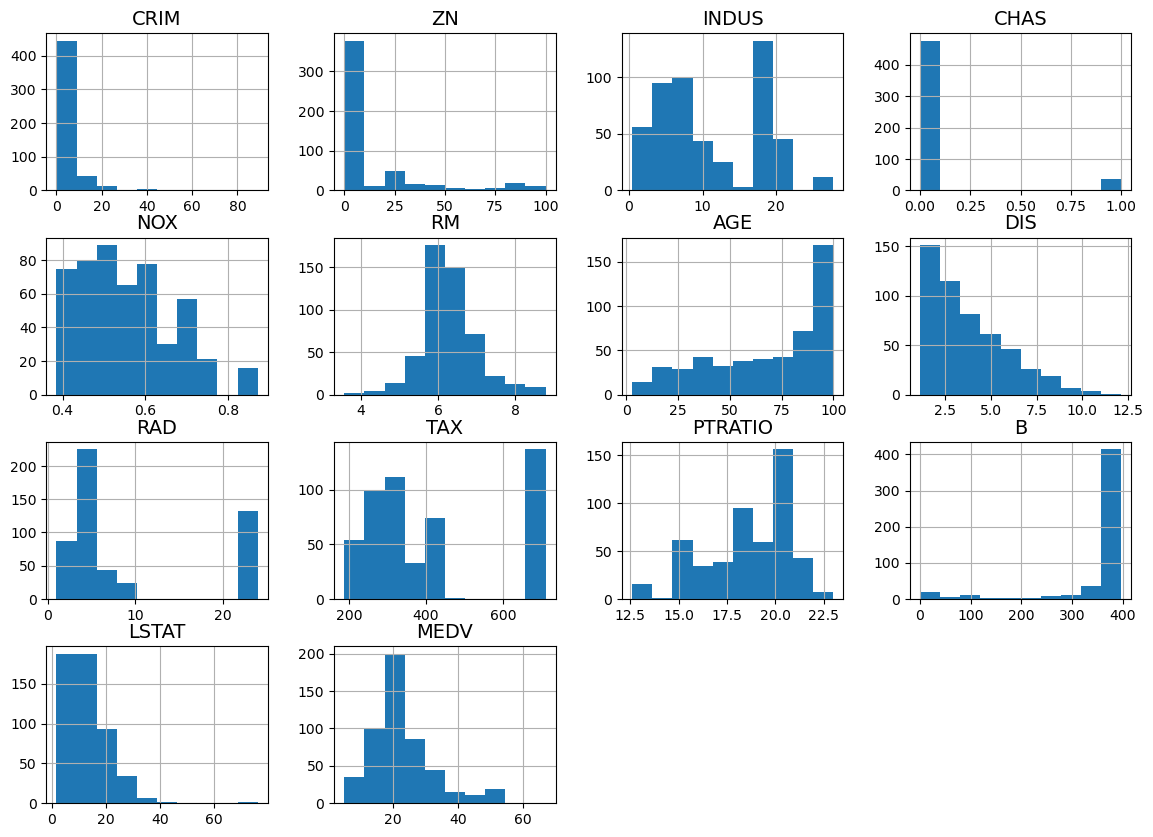

In [7]:
# Visualize data to gain more insights

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_data.hist(bins=10, figsize=(14,10))

## Create Test Set

In [8]:
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [9]:
train_set.count()

CRIM       408
ZN         408
INDUS      408
CHAS       408
NOX        408
RM         404
AGE        408
DIS        408
RAD        408
TAX        408
PTRATIO    408
B          408
LSTAT      408
MEDV       408
dtype: int64

In [10]:
test_set.count()

CRIM       103
ZN         103
INDUS      103
CHAS       103
NOX        103
RM         102
AGE        103
DIS        103
RAD        103
TAX        103
PTRATIO    103
B          103
LSTAT      103
MEDV       103
dtype: int64

In [11]:
train_set.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         4
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

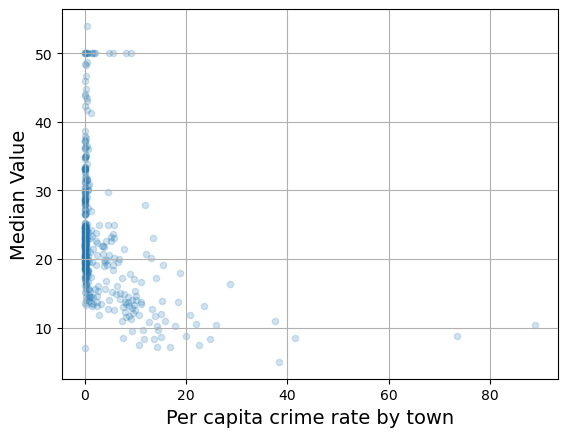

In [12]:
# Visualize the training set

train_set_copy = train_set.copy()
train_set_copy.plot(kind="scatter", x="CRIM", y="MEDV", grid=True,alpha=0.2)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Median Value")
plt.show()

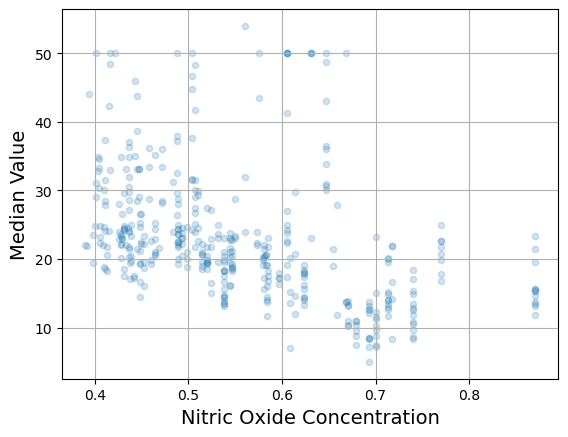

In [13]:
train_set_copy.plot(kind="scatter", x="NOX", y="MEDV", grid=True,alpha=0.2)
plt.xlabel("Nitric Oxide Concentration")
plt.ylabel("Median Value")
plt.show()

## Looking for Correlations

In [14]:
corr_matrix = train_set_copy.corr()

In [15]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.709819
ZN         0.347225
B          0.308266
DIS        0.214878
CHAS       0.168996
AGE       -0.349627
CRIM      -0.377210
RAD       -0.386503
NOX       -0.409165
TAX       -0.460629
INDUS     -0.467748
PTRATIO   -0.497512
LSTAT     -0.687717
Name: MEDV, dtype: float64

## Data Cleaning

In [16]:
## display rows with missing values
null_rows_dix = train_set.isnull().any(axis=1)
train_set[null_rows_dix].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [17]:
# we use a median strategy to fill the missiing values. We use the fillna method of pandas DataFrame.
# we will be working on a copy of the training set. Later we will use a pipeline on the real train set
# We use the fillna method with the median
train_set_copy = train_set.copy()
median = train_set["RM"].median()
train_set_copy["RM"].fillna(median, inplace=True)
train_set_copy.loc[null_rows_dix].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,6.2085,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
96,0.11504,0.0,2.89,0,0.445,6.2085,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
35,0.06417,0.0,5.96,0,0.499,6.2085,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
135,0.55778,0.0,21.89,0,0.624,6.2085,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [18]:
## alternatively use scikit learn

imputer = SimpleImputer(strategy="median")

train_set_copy = train_set.copy()
imputer.fit(train_set_copy)

SimpleImputer(strategy='median')

In [19]:
imputer.statistics_

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.79000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90000e+01, 3.91305e+02, 1.13600e+01, 2.15500e+01])

In [20]:
train_set_copy.median().values

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.79000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90000e+01, 3.91305e+02, 1.13600e+01, 2.15500e+01])

In [21]:
X = imputer.transform(train_set_copy)
X

array([[1.35870e-01, 0.00000e+00, 1.05900e+01, ..., 3.81320e+02,
        1.46600e+01, 2.44000e+01],
       [2.00900e-02, 9.50000e+01, 2.68000e+00, ..., 3.90550e+02,
        2.88000e+00, 5.00000e+01],
       [3.53700e-02, 3.40000e+01, 6.09000e+00, ..., 3.95750e+02,
        9.50000e+00, 2.20000e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 3.90940e+02,
        5.99000e+00, 2.45000e+01],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 1.09850e+02,
        2.32700e+01, 1.34000e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 7.08000e+01,
        1.06300e+01, 1.86000e+01]])

In [22]:
# display columns

imputer.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [23]:
housing_train_set_copy = pd.DataFrame(X, columns=train_set_copy.columns,
                          index=train_set_copy.index)
housing_train_set_copy.loc[null_rows_dix].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0.0,0.524,6.2085,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
96,0.11504,0.0,2.89,0.0,0.445,6.2085,69.6,3.4952,2.0,276.0,18.0,391.83,11.34,21.4
35,0.06417,0.0,5.96,0.0,0.499,6.2085,68.2,3.3603,5.0,279.0,19.2,396.90,9.68,18.9
135,0.55778,0.0,21.89,0.0,0.624,6.2085,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1


In [24]:
imputer.strategy

'median'

In [25]:
## Feature Scaling
# We use the standard scaler from sklearn rather than the mean max scaler. This uses the mean along with the standard deviation
# ensuring no any outlier does not skew the scaled values

std_scaler = StandardScaler()
train_set_copy_scaled = std_scaler.fit_transform(train_set_copy)

In [26]:
# output from sklearn transformers are numpy arrays. We can easily transform it back into a DataFrame

train_set_copy_scaled_pd = pd.DataFrame(train_set_copy_scaled, 
                                       columns=train_set_copy.columns, index=train_set_copy.index)

In [27]:
train_set_copy_scaled_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
208,-0.408811,-0.491514,-0.069772,3.549648,-0.575591,-0.331339,-0.364953,0.215660,-0.632043,-0.766004,0.066325,0.252101,0.261413,0.155267
204,-0.423190,3.524311,-1.219964,-0.281718,-1.208960,2.425966,-1.341871,0.633024,-0.632043,-1.081847,-1.689685,0.360077,-1.338663,2.846042
301,-0.421292,0.945729,-0.724116,-0.281718,-1.062129,0.404876,-1.036584,0.810504,-0.284192,-0.456120,-1.059323,0.420908,-0.439470,-0.096993
390,0.438965,-0.491514,1.022256,-0.281718,1.257618,-0.822615,0.996266,-0.882698,1.686964,1.552165,0.786739,0.405466,0.594196,-0.822241
416,0.919846,-0.491514,1.022256,-0.281718,1.075166,0.673608,0.773587,-0.933515,1.686964,1.552165,0.786739,-3.956364,1.773199,-1.621065


## Transformation Pipelines

In [28]:
# Make a simple pipeline that combines the two steps above: Data Estimation and Feature Scaling

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),
                         ("standardize", StandardScaler())])

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [29]:
housing_train_set_prepared = num_pipeline.fit_transform(train_set)
housing_train_set_prepared

array([[-0.40881102, -0.49151368, -0.06977179, ...,  0.25210135,
         0.26141257,  0.15526673],
       [-0.42319008,  3.52431056, -1.21996393, ...,  0.36007671,
        -1.33866327,  2.8460415 ],
       [-0.42129241,  0.94572868, -0.72411625, ...,  0.4209079 ,
        -0.43946955, -0.0969934 ],
       ...,
       [-0.42382098,  2.89023305, -1.31738855, ...,  0.36463905,
        -0.91623238,  0.16577757],
       [ 0.96035748, -0.49151368,  1.0222564 , ..., -2.92363766,
         1.43090773, -1.00092555],
       [-0.39727474, -0.49151368, -0.36495385, ..., -3.3804565 ,
        -0.2859818 , -0.45436193]])

In [30]:
# Again we can convert the output to a DataFrame

df_housing_train_set_prepared = pd.DataFrame(housing_train_set_prepared,
                                            columns=num_pipeline.get_feature_names_out(),
                                            index=train_set.index)

In [31]:
df_housing_train_set_prepared.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
208,-0.408811,-0.491514,-0.069772,3.549648,-0.575591,-0.331676,-0.364953,0.215660,-0.632043,-0.766004,0.066325,0.252101,0.261413,0.155267
204,-0.423190,3.524311,-1.219964,-0.281718,-1.208960,2.439019,-1.341871,0.633024,-0.632043,-1.081847,-1.689685,0.360077,-1.338663,2.846042
301,-0.421292,0.945729,-0.724116,-0.281718,-1.062129,0.408114,-1.036584,0.810504,-0.284192,-0.456120,-1.059323,0.420908,-0.439470,-0.096993
390,0.438965,-0.491514,1.022256,-0.281718,1.257618,-0.825338,0.996266,-0.882698,1.686964,1.552165,0.786739,0.405466,0.594196,-0.822241
416,0.919846,-0.491514,1.022256,-0.281718,1.075166,0.678151,0.773587,-0.933515,1.686964,1.552165,0.786739,-3.956364,1.773199,-1.621065


In [32]:
num_pipeline.steps

[('impute', SimpleImputer(strategy='median')),
 ('standardize', StandardScaler())]

## Training and Evaluating on the Training Set

In [33]:
# Drop the MEDV column since this is the label for the dataset
train_set_copy = train_set.drop(["MEDV"], axis=1)

# create train_set_labels
train_set_labels = train_set["MEDV"].copy()

In [34]:
# create a new pipeline that includes: Data Estimation, Feature Scaling and Linear Regression

lin_reg = make_pipeline(num_pipeline, SGDRegressor())
lin_reg.fit(train_set_copy, train_set_labels)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                                 ('standardize', StandardScaler())])),
                ('sgdregressor', SGDRegressor())])

In [35]:
# View predictions

housing_predictions = lin_reg.predict(train_set_copy)
housing_predictions[:5]

array([24.12964166, 43.69748291, 28.85269617, 16.33829444, 15.04749723])

In [36]:
# View labels for same data

train_set_labels.iloc[:5].values

array([24.4, 50. , 22. , 15.1,  7.5])

In [37]:
# From the above, the predictions are close for the first and 4th but off by a lot for the others. 
# We can use better metrics to get an overall view of the performance

lin_rmse = mean_squared_error(train_set_labels, housing_predictions,
                              squared=False)
lin_rmse

5.249373935760156

In [38]:
# A value of 5.238 is not too bad for Linear Regression but may be we could do better with another model or with regularization


In [39]:
tree_rmses = -cross_val_score(lin_reg, train_set_copy, train_set_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [40]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      5.424255
std       1.235920
min       3.613922
25%       4.593149
50%       5.068390
75%       6.052803
max       7.540935
dtype: float64

In [41]:
# verify with test set
housing_predictions = lin_reg.predict(test_set.drop(['MEDV'],axis=1))
housing_predictions[:5]

array([20.35102109, 25.45290626, 17.116179  , 21.94085617, 17.9649949 ])

In [42]:
test_set_labels= test_set["MEDV"].copy()

In [43]:
test_set_labels[:5].values

array([18.8, 23.9, 14.3, 20.9, 17.4])

In [44]:
housing_data_train = housing_data.copy()
housing_data_labels = housing_data["MEDV"].copy()
housing_data_train = housing_data_train.drop(["MEDV"], axis=1)

housing_predictions = lin_reg.predict(housing_data_train)

13


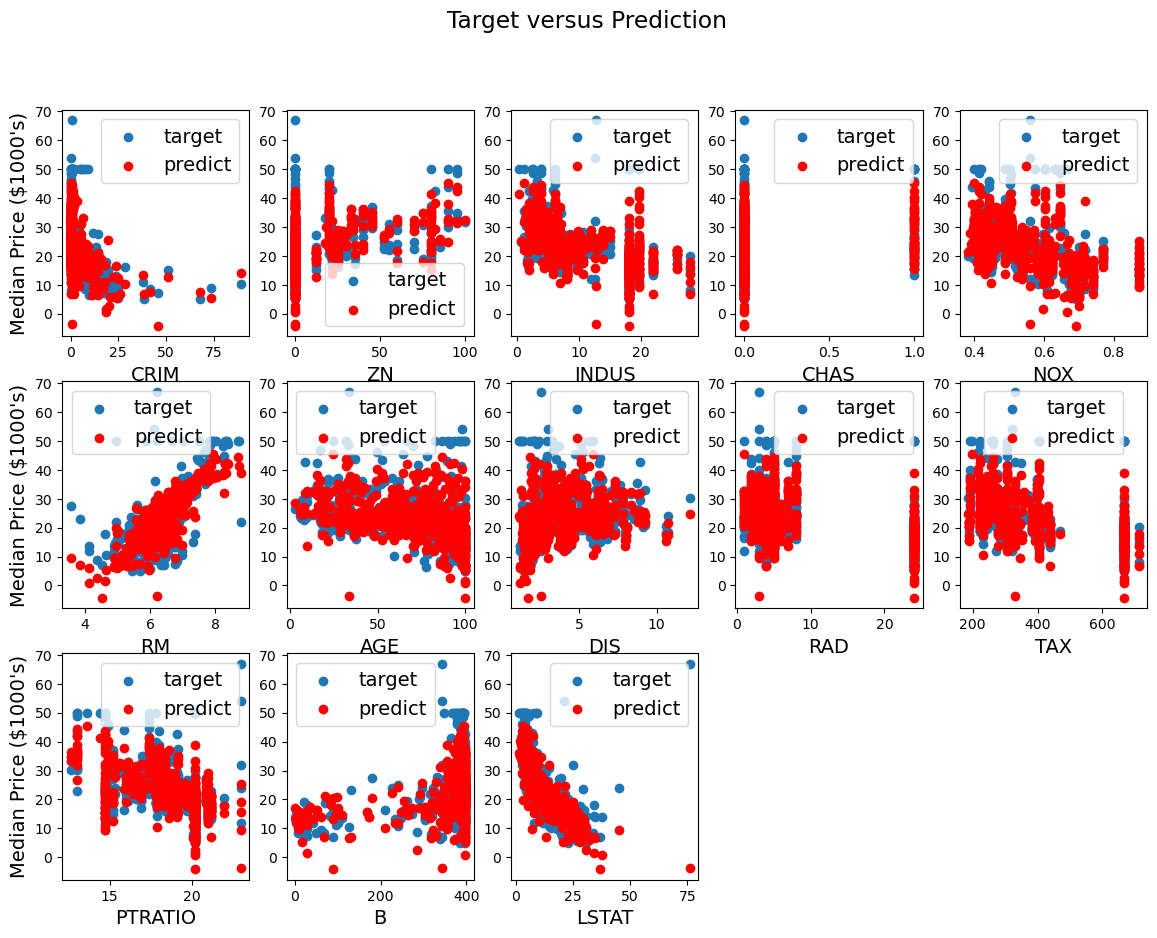

In [45]:
# plot predictions and targets vs original features    
fig = plt.figure(figsize =([14, 10]))
gs = gridspec.GridSpec(3, 5)
i=0
ypred = housing_predictions.copy()
yvalues = housing_data["MEDV"].to_numpy()
print(housing_data_train.columns.size)
for column in housing_data_train.columns:
    row = int(i / 5)
    col = int(i % 5)
    ax = plt.subplot(gs[row,col])
    ax.scatter(housing_data_train[column].to_numpy(),yvalues, label = 'target')
    ax.set_xlabel(column)
    ax.scatter(housing_data_train[column].to_numpy(),ypred,color='r', label = 'predict')
    ax.legend()
    if (row==0 and col==0)or(row==1 and col==0)or(row==2 and col==0):
        ax.set_ylabel("Median Price ($1000's)");
    i+=1
fig.suptitle("Target versus Prediction")
plt.show()